REGRESSION ALGORTIHM

In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import plotly.express as px
import sklearn 
%matplotlib inline


In [124]:
df = pd.read_csv('C:\\Users\\Vedant\\Desktop\\TWO DIRECTION\\AIML\\VS CODE\\scikit\\datas\\insurance.csv')
df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [126]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


NOW WE CHECK CORREALTION AMONG ALL


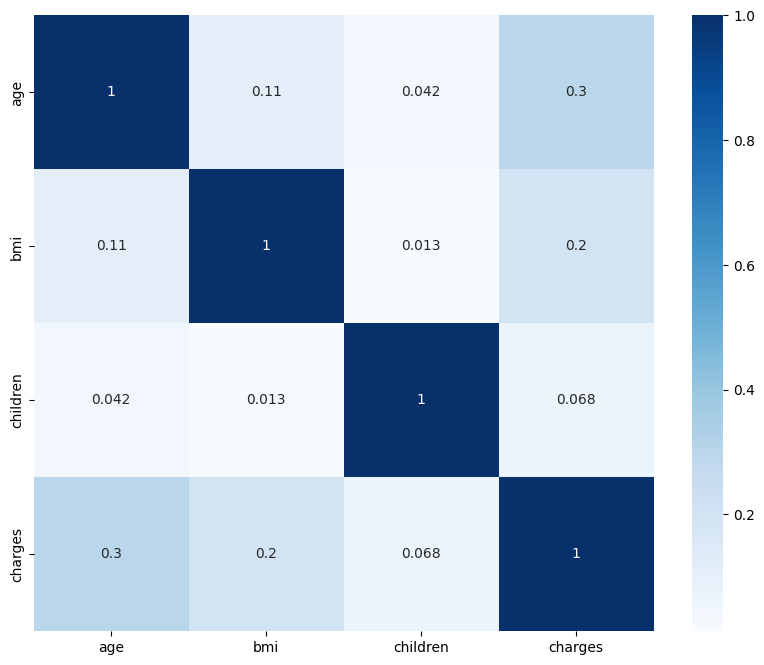

In [127]:
# Only use numeric columns for correlation to avoid string conversion errors
corre = df.select_dtypes(include=[float, int]).corr()
corre
plt.figure(figsize=(10,8))
sns.heatmap(corre,cmap='Blues',annot=True)
plt.show()

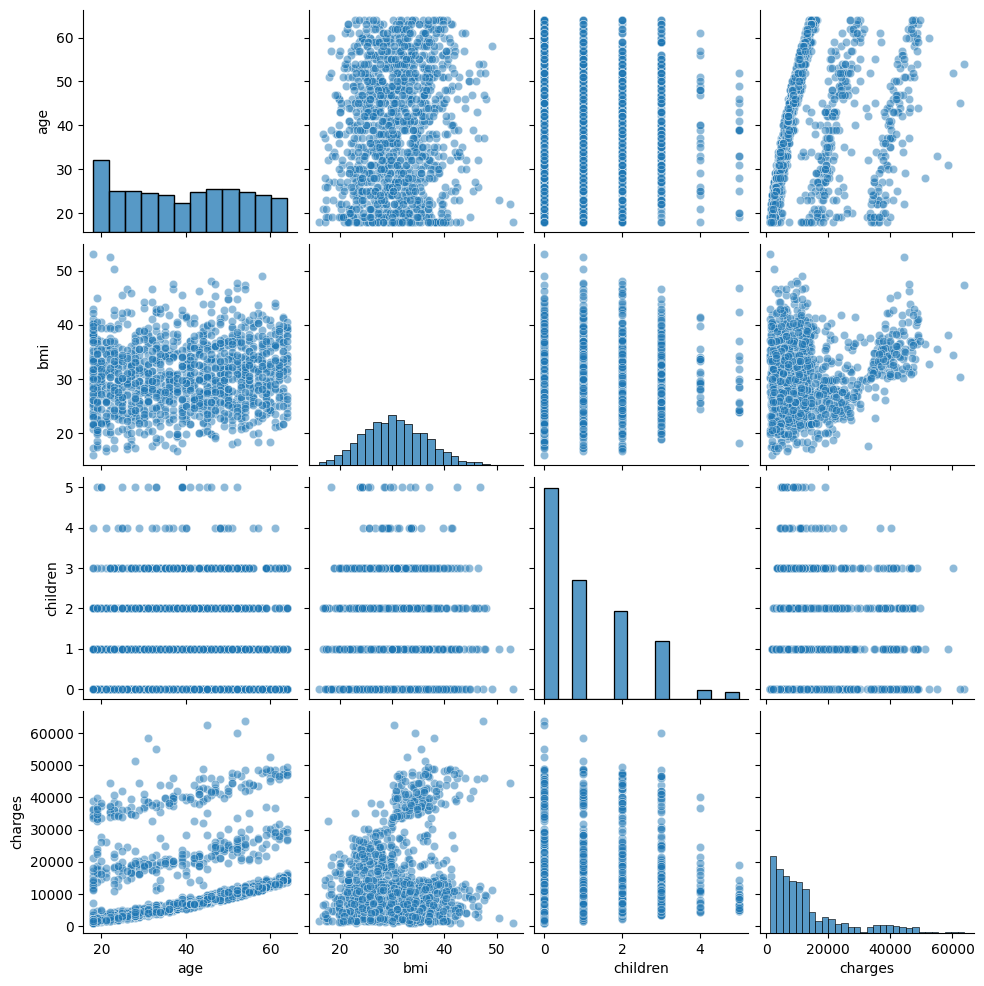

In [128]:
#NOW WE CHECK CORRELATION AMONG ALL THE COLUMNS

visual=df[['age','bmi','children','charges']]
sns.pairplot(visual,kind = 'scatter' , plot_kws={'alpha':0.5})

I GO WITH CHARGES AND AGE WHERE I TRY TO PREDICT CHARGE USING AGE
FOR MALE AND THEN FEMALE


In [129]:
no_female=df[df.sex=='male']


<Axes: title={'center': 'age vs charges only for male'}, xlabel='age', ylabel='charges'>

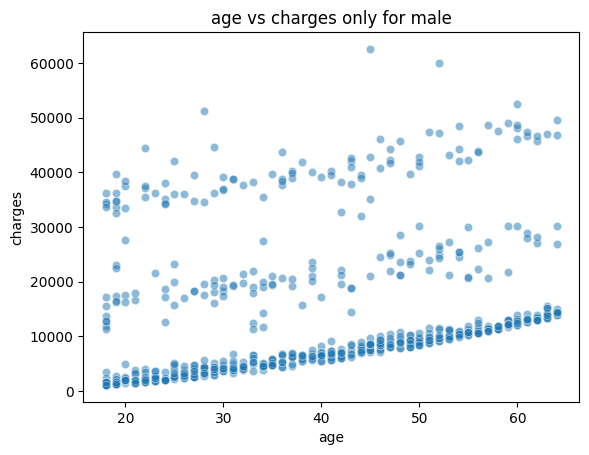

In [130]:
plt.title('age vs charges only for male')
sns.scatterplot(data=no_female,x='age',y='charges', alpha = 0.5 )


In [131]:
fig = px.scatter(df,x='age',y='charges',color='sex',opacity=0.5, title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

NOW WE ARE CREATING A MODEL TO PREDICT THE CHARGES


In [132]:
def estimate_charge(age , m , b):
    return m*age + b


In [133]:
m=50
b=600   #asuuming a constant value to fir the linear regression

In [134]:
#create a varibale with only age of males
ages=no_female.age
ages

1       18
2       28
3       33
4       32
8       37
        ..
1324    31
1325    61
1327    51
1329    52
1333    50
Name: age, Length: 676, dtype: int64

In [135]:
predictions=estimate_charge(ages,m,b)
predictions

1       1500
2       2000
3       2250
4       2200
8       2450
        ... 
1324    2150
1325    3650
1327    3150
1329    3200
1333    3100
Name: age, Length: 676, dtype: int64

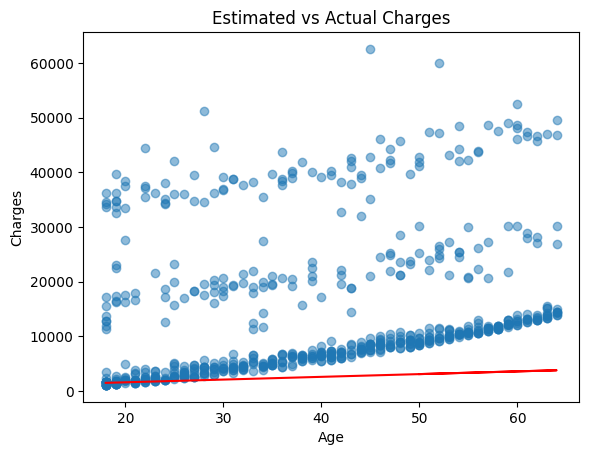

In [136]:
target=no_female.charges
plt.plot(ages,predictions,color='red')
plt.scatter(ages,target,alpha=0.5)
plt.title('Estimated vs Actual Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [137]:
def try_parameters(m,b):
    ages = no_female.age
    target = no_female.charges
    predictions = estimate_charge(ages,m,b)
    plt.plot(ages,predictions,color='red')
    plt.scatter(ages,target,alpha=0.5)
    plt.title('Estimated vs Actual Charges')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.show()

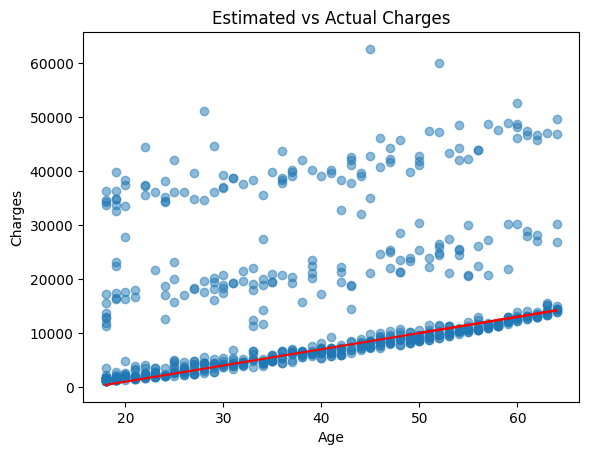

In [138]:
try_parameters(300,-5000)

In [156]:
def rmse(target , predictions):
    return np.sqrt(((predictions - target) ** 2).mean())


In [140]:
m=40
b=700

In [153]:
target2 = no_female[['charges']]
off= estimate_charge(no_female.age,m,b)



In [157]:
rmse(target2,off)

charges   NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
1324      NaN
1325      NaN
1327      NaN
1329      NaN
1333      NaN
Length: 677, dtype: float64

Let's compute the RMSE for our model 

In [ ]:
m = 50
b = 100

In [ ]:
try_parameters(m,b)

In [ ]:
targets= no_female['charges']
predicted2 = estimate_charge(ages,m,b)

In [ ]:
rmse(targets , predicted2)

In [ ]:
def try_parameters(m,b):
    ages = no_female.age
    target = no_female.charges

    predictions = estimate_charge(ages,m,b)

    plt.plot(ages,predictions,color='red',alpha = 0.5)
    plt.scatter(ages,target,alpha=0.5)
    plt.title('Estimated vs Actual Charges')
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Prediction' , 'Actual'])

    loss = rmse(target, predictions)
    print('RMSE Loss :', loss)

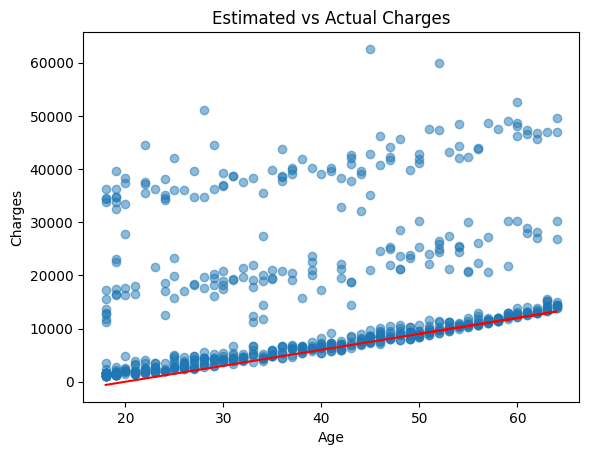

In [161]:
try_parameters(300,-6000)

LINEAR REGRESSION USING SCIKIT-LEARN

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [ ]:
inputs = no_female[['age']]
targets = no_female.charges

In [ ]:
model.fit(inputs , targets )

In [ ]:
predictions = model.predict(inputs)
predictions

In [159]:
rmse(targets , predictions)

np.float64(17133.63622571649)

In [ ]:
M=model.coef_ #m value

In [ ]:
B=model.intercept_ #b value   

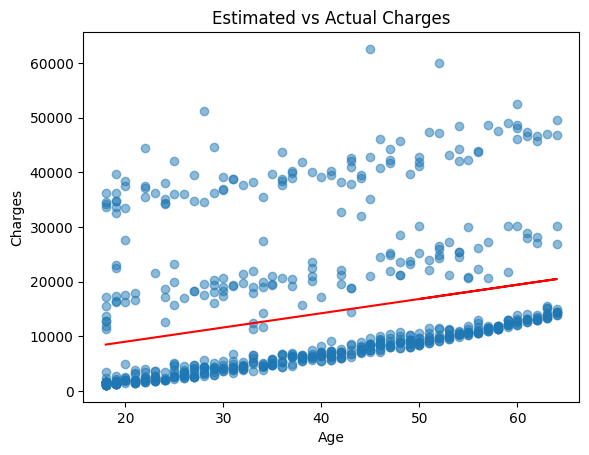

In [160]:
try_parameters(M,B)